[link text](https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887)

***ARIMA***

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
url ="https://raw.githubusercontent.com/Ashutoshrx/NIFTY50/master/nifty50.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close
0,02-Nov-15,8054.55,8060.70,7995.60,8050.80
1,03-Nov-15,8086.35,8100.35,8031.75,8060.70
2,04-Nov-15,8104.90,8116.10,8027.30,8040.20
3,05-Nov-15,8030.35,8031.20,7944.10,7955.45
4,06-Nov-15,7956.55,8002.65,7926.15,7954.30


In [ ]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Open,High,Low,Close
Date,,,,
2015-11-02,8054.55,8060.70,7995.60,8050.80
2015-11-03,8086.35,8100.35,8031.75,8060.70
2015-11-04,8104.90,8116.10,8027.30,8040.20
2015-11-05,8030.35,8031.20,7944.10,7955.45
2015-11-06,7956.55,8002.65,7926.15,7954.30


In [ ]:
!pip install -q pyramid-arima

In [ ]:
from pyramid.arima import auto_arima
auto_arima(df['Close'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5858.158
Date:                Mon, 09 Mar 2020   AIC                          11720.316
Time:                        08:14:29   BIC                          11730.143
Sample:                             0   HQIC                         11724.050
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.9793      2.692      1.478      0.139      -1.298       9.256
sigma2      6691.2768    111.372     60.080      0.000    6472.991    6909.563
===================================================================================
Ljung-Box (Q):                       63.22   Jarque-Bera (JB):              8017.30
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
arima_model = SARIMAX(train_data['Close'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  995
Model:             SARIMAX(2, 1, 1)x(4, 0, 3, 12)   Log Likelihood               -5784.248
Date:                            Mon, 09 Mar 2020   AIC                          11590.496
Time:                                    08:16:07   BIC                          11644.416
Sample:                                         0   HQIC                         11610.995
                                            - 995                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0318      0.709      0.045      0.964      -1.357       1.421
ar.L2          0.0482      0.031      1.547      0.122      -0.013       0.109
ma.L1         -0.0342      0.710     -0.048      0.962      -1.425       1.357
ar.S.L12       0.2023      0.470      0.431      0.667      -0.718       1.123
ar.S.L24      -0.5478      0.258     -2.120      0.034      -1.054      -0.041
ar.S.L36       0.6726      0.443      1.517      0.129      -0.196       1.542
ar.S.L48      -0.0254      0.044     -0.581      0.561      -0.111       0.060
ma.S.L12      -0.1984      0.472     -0.421      0.674      -1.123       0.726
ma.S.L24       0.5570      0.245      2.277      0.023       0.077       1.036
ma.S.L36      -0.7176      0.452     -1.589      0.112      -1.603       0.168
sigma2      6683.1352    191.253     34.944      0.000    6308.286    7057.984
===================================================================================
Ljung-Box (Q):                       57.52   Jarque-Bera (JB):              7967.12
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                             1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

995     11987.585690
996     11989.073080
997     11994.941951
998     11992.077809
999     11981.435900
1000    11995.084555
1001    11996.429089
1002    12003.982941
1003    12008.562122
1004    12005.758814
1005    12019.831075
1006    11987.058084
Name: ARIMA Predictions, dtype: float64

In [ ]:
df = pd.DataFrame(arima_pred.as_matrix(), index=test_data.index, columns=['ARIMA_Predictions'])

In [ ]:
test_data['ARIMA_Predictions']= pd.DataFrame(arima_pred.as_matrix(), index=test_data.index, columns=['ARIMA_Predictions'])

In [ ]:
test_data['ARIMA_Predictions']

Date
2019-11-21    11987.585690
2019-11-22    11989.073080
2019-11-25    11994.941951
2019-11-26    11992.077809
2019-11-27    11981.435900
2019-11-28    11995.084555
2019-11-29    11996.429089
2019-12-02    12003.982941
2019-12-06    12008.562122
2019-12-12    12005.758814
2019-12-13    12019.831075
2019-12-16    11987.058084
Name: ARIMA_Predictions, dtype: float64

***PROPHET***

In [ ]:
import statsmodels.api as sm
df = pd.read_csv(url)

In [ ]:
df.Month = pd.to_datetime(df.Date)
df = df.set_index("Date")
df.head()

,Open,High,Low,Close
Date,,,,
02-Nov-15,8054.55,8060.70,7995.60,8050.80
03-Nov-15,8086.35,8100.35,8031.75,8060.70
04-Nov-15,8104.90,8116.10,8027.30,8040.20
05-Nov-15,8030.35,8031.20,7944.10,7955.45
06-Nov-15,7956.55,8002.65,7926.15,7954.30


In [ ]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.head()

,Date,Open,High,Low,Close
0,02-Nov-15,8054.55,8060.70,7995.60,8050.80
1,03-Nov-15,8086.35,8100.35,8031.75,8060.70
2,04-Nov-15,8104.90,8116.10,8027.30,8040.20
3,05-Nov-15,8030.35,8031.20,7944.10,7955.45
4,06-Nov-15,7956.55,8002.65,7926.15,7954.30


In [ ]:
df_pr.columns = ['ds','open','high','low','y'] # To use prophet column names should be like that\

In [ ]:
rows=len(df_pr)
rows

1007

In [ ]:
train_data_pr = df_pr.iloc[:rows-12]
test_data_pr = df_pr.iloc[rows-12:]

In [ ]:
from fbprophet import Prophet

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
len(prophet_pred)

12

In [ ]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
test_data_pr["Prophet_Predictions"]

995     11574.824955
996     11678.964589
997     11796.095675
998     12008.275307
999     12246.247315
1000    12374.080499
1001    12504.234669
1002    12359.005115
1003    12258.838029
1004    12323.461034
1005    12225.285304
1006    12522.411629
Name: Prophet_Predictions, dtype: float64

In [ ]:
"""import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Close"])
sns.lineplot(x=test_data.index, y = test_data["prophet_pred"]);"""


'import seaborn as sns\nplt.figure(figsize=(16,5))\nax = sns.lineplot(x= test_data.index, y=test_data["Close"])\nsns.lineplot(x=test_data.index, y = test_data["prophet_pred"]);'

***LSTM***

In [ ]:
training_set = pd.read_csv(url)

In [ ]:
rows=len(training_set)
rows

1007

In [ ]:
training_set = training_set.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [ ]:
X_train = training_set[0:rows-1]
y_train = training_set[1:rows]

In [ ]:
X_train = np.reshape(X_train, (rows-1, 1, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1006/1006 [==============================] - 1s 817us/step - loss: 0.9150
Epoch 2/200
1006/1006 [==============================] - 0s 69us/step - loss: 0.7847
Epoch 3/200
1006/1006 [==============================] - 0s 70us/step - loss: 0.6726
Epoch 4/200
1006/1006 [==============================] - 0s 79us/step - loss: 0.5756
Epoch 5/200
1006/1006 [==============================] - 0s 121us/step - loss: 0.4913
Epoch 6/200
1006/1006 [==============================] - 0s 86us/step - loss: 0.4188
Epoch 7/200
1006/1006 [==============================] - 0s 90us/step - loss: 0.3560
Epoch 8/200
1006/1006 [==============================] - 0s 79us/step - loss: 0.3024
Epoch 9/200
1006/1006 [==============================] - 0s 83us/step - loss: 0.2567
Epoch 10/200
1006/1006 [==============================] - 0s 72us/step - loss: 0.2183
Epoch 11/200
1006/1006 [==============================] - 0s 83us/step - loss: 0.1859
Epoch 12/200
1006/1006 [==============================] - 0s 

In [ ]:
urltest="https://raw.githubusercontent.com/RonAshu/NIFTY50/master/nifty50.csv"
test_set = pd.read_csv(urltest)
rows=len(test_set)
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (rows, 1, 1))

In [ ]:
predicted_lstm_price = regressor.predict(inputs)
predicted_lstm_price = sc.inverse_transform(predicted_lstm_price)

In [ ]:
predicted_lstm_price

array([[ 8053.4688],
       [ 8083.378 ],
       [ 8100.8574],
       ...,
       [11913.876 ],
       [11975.916 ],
       [12015.163 ]], dtype=float32)

***GRU***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU

In [ ]:
regressor = Sequential()
regressor.add(GRU(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1006/1006 [==============================] - 1s 842us/step - loss: 0.1459
Epoch 2/200
1006/1006 [==============================] - 0s 63us/step - loss: 0.1034
Epoch 3/200
1006/1006 [==============================] - 0s 77us/step - loss: 0.0781
Epoch 4/200
1006/1006 [==============================] - 0s 73us/step - loss: 0.0655
Epoch 5/200
1006/1006 [==============================] - 0s 73us/step - loss: 0.0599
Epoch 6/200
1006/1006 [==============================] - 0s 71us/step - loss: 0.0571
Epoch 7/200
1006/1006 [==============================] - 0s 74us/step - loss: 0.0553
Epoch 8/200
1006/1006 [==============================] - 0s 73us/step - loss: 0.0537
Epoch 9/200
1006/1006 [==============================] - 0s 71us/step - loss: 0.0522
Epoch 10/200
1006/1006 [==============================] - 0s 64us/step - loss: 0.0506
Epoch 11/200
1006/1006 [==============================] - 0s 68us/step - loss: 0.0490
Epoch 12/200
1006/1006 [==============================] - 0s 6

In [ ]:
predicted_gru_price = regressor.predict(inputs)
predicted_gru_price = sc.inverse_transform(predicted_gru_price)

In [ ]:
test_set['pred_LSTM']=predicted_lstm_price
test_set['pred_GRU']=predicted_gru_price
test_set.head()

,Date,Open,High,Low,Close,pred_LSTM,pred_GRU
0,02-Nov-15,8054.55,8060.70,7995.60,8050.80,8053.468750,8059.348145
1,03-Nov-15,8086.35,8100.35,8031.75,8060.70,8083.377930,8091.167480
2,04-Nov-15,8104.90,8116.10,8027.30,8040.20,8100.857422,8109.736328
3,05-Nov-15,8030.35,8031.20,7944.10,7955.45,8030.756348,8035.142090
4,06-Nov-15,7956.55,8002.65,7926.15,7954.30,7961.748535,7961.377930


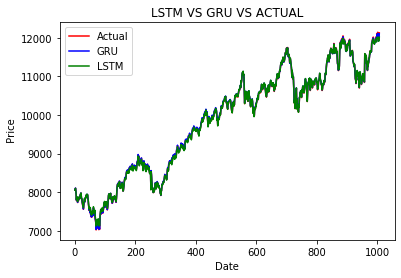

In [ ]:
plt.plot(test_set.iloc[:,1:2].values, color = 'r', label = 'Actual')
#plt.set_size_inches(16,5)
plt.plot(test_set['pred_GRU'], color = 'b', label = 'GRU')
plt.plot(test_set['pred_LSTM'], color = 'g', label = 'LSTM')
plt.title('LSTM VS GRU VS ACTUAL')
plt.xlabel('Date')
plt.ylabel(' Price')
plt.legend()
plt.show()

***FINAL***

In [ ]:
predicted_gru_price,predicted_lstm_price,test_data['ARIMA_Predictions'],test_data['Close'],test_data_pr['Prophet_Predictions'
]

(array([[ 8059.348 ],
        [ 8091.1675],
        [ 8109.7363],
        ...,
        [11925.756 ],
        [12004.014 ],
        [12103.702 ]], dtype=float32), array([[ 8053.4688],
        [ 8083.378 ],
        [ 8100.8574],
        ...,
        [11913.876 ],
        [11975.916 ],
        [12015.163 ]], dtype=float32), Date
 2019-11-21    11987.585690
 2019-11-22    11989.073080
 2019-11-25    11994.941951
 2019-11-26    11992.077809
 2019-11-27    11981.435900
 2019-11-28    11995.084555
 2019-11-29    11996.429089
 2019-12-02    12003.982941
 2019-12-06    12008.562122
 2019-12-12    12005.758814
 2019-12-13    12019.831075
 2019-12-16    11987.058084
 Name: ARIMA_Predictions, dtype: float64, Date
 2019-11-21    11968.40
 2019-11-22    11914.40
 2019-11-25    12073.75
 2019-11-26    12037.70
 2019-11-27    12100.70
 2019-11-28    12151.15
 2019-11-29    12056.05
 2019-12-02    12048.20
 2019-12-06    11921.50
 2019-12-12    11971.80
 2019-12-13    12086.70
 2019-12-16    12053.95
 

In [ ]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
test_data_pr['ARIMA']=test_data['ARIMA_Predictions'].values

In [ ]:
test_data_pr.head()

,ds,open,high,low,y,Prophet_Predictions,ARIMA
995,21-Nov-19,12025.65,12028.20,11956.90,11968.40,11574.824955,11987.585690
996,22-Nov-19,11967.30,11968.10,11883.50,11914.40,11678.964589,11989.073080
997,25-Nov-19,11922.45,12084.50,11919.75,12073.75,11796.095675,11994.941951
998,26-Nov-19,12110.20,12132.45,12006.35,12037.70,12008.275307,11992.077809
999,27-Nov-19,12068.50,12114.90,12055.15,12100.70,12246.247315,11981.435900


In [ ]:
len(test_data_pr)

12

In [ ]:
test_set.head()

,Date,Open,High,Low,Close,pred_LSTM,pred_GRU
0,02-Nov-15,8054.55,8060.70,7995.60,8050.80,8053.468750,8059.348145
1,03-Nov-15,8086.35,8100.35,8031.75,8060.70,8083.377930,8091.167480
2,04-Nov-15,8104.90,8116.10,8027.30,8040.20,8100.857422,8109.736328
3,05-Nov-15,8030.35,8031.20,7944.10,7955.45,8030.756348,8035.142090
4,06-Nov-15,7956.55,8002.65,7926.15,7954.30,7961.748535,7961.377930


In [ ]:
test_set.iloc[995:1007,5:7]

,pred_LSTM,pred_GRU
995,11975.442383,12003.300781
996,11934.632812,11947.704102
997,11894.143555,11904.888672
998,12007.897461,12083.644531
999,11993.511719,12044.050781
1000,12015.420898,12104.413086
1001,12020.253906,12117.775391
1002,12017.118164,12109.104492
1003,11986.186523,12023.945312
1004,11913.875977,11925.755859


In [ ]:
test_data_pr['LSTM']=test_set.iloc[995:1007,5:6]

In [ ]:
test_data_pr['GRU']=test_set.iloc[995:1007,6:7]

In [ ]:
test_data_pr['Close']=test_set.iloc[995:1007,6:7]=test_set.iloc[995:1007,4:5]

In [ ]:
len(predicted_lstm_price)

1007

In [ ]:
test_data_pr.head()

,ds,open,high,low,y,Prophet_Predictions,ARIMA,LSTM,GRU,Close
995,21-Nov-19,12025.65,12028.20,11956.90,11968.40,11574.824955,11987.585690,11975.442383,12003.300781,11968.40
996,22-Nov-19,11967.30,11968.10,11883.50,11914.40,11678.964589,11989.073080,11934.632812,11947.704102,11914.40
997,25-Nov-19,11922.45,12084.50,11919.75,12073.75,11796.095675,11994.941951,11894.143555,11904.888672,12073.75
998,26-Nov-19,12110.20,12132.45,12006.35,12037.70,12008.275307,11992.077809,12007.897461,12083.644531,12037.70
999,27-Nov-19,12068.50,12114.90,12055.15,12100.70,12246.247315,11981.435900,11993.511719,12044.050781,12100.70


In [ ]:
test_data_pr['y']

995     11968.40
996     11914.40
997     12073.75
998     12037.70
999     12100.70
1000    12151.15
1001    12056.05
1002    12048.20
1003    11921.50
1004    11971.80
1005    12086.70
1006    12053.95
Name: y, dtype: float64

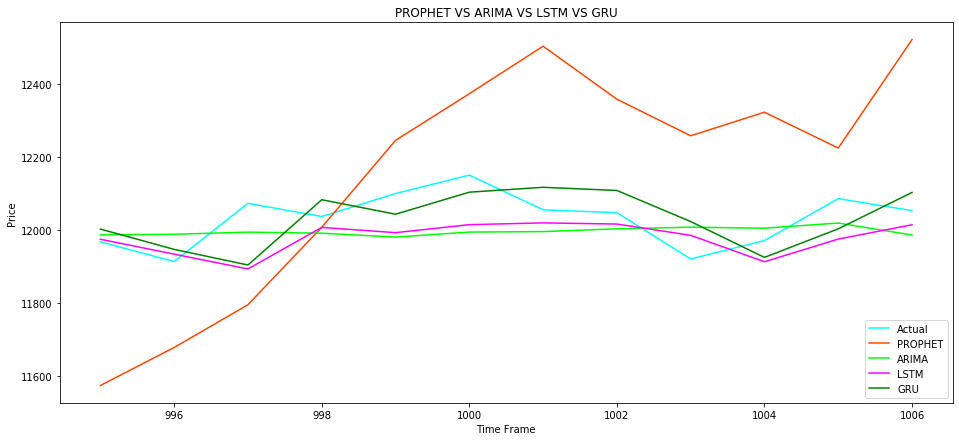

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(test_data_pr["Close"],color='aqua',label = 'Actual')

plt.plot(test_data_pr["Prophet_Predictions"],color='orangered',label = 'PROPHET')
plt.plot(test_data_pr["ARIMA"],color='lime',label = 'ARIMA')
plt.plot(test_data_pr["LSTM"],color='magenta',label = 'LSTM')
plt.plot(test_data_pr["GRU"],color='g',label = 'GRU')

plt.title('PROPHET VS ARIMA VS LSTM VS GRU')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.legend(loc='lower right')
plt.show()